In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [160]:
data = pd.read_csv('responses.csv')

In [135]:
data.head()

,birth,gender,sexuality,ethnicity,childhood,religion,politics,parent_edu,parent_north_amer,household_inc,parent_stem,family_funded,hs_avg,hs_extrac,hs_accel,discovery,fac_apps,industry_goal,job_search_1a,job_search_1b,job_search_2a,job_search_2b,job_search_3a,job_search_3b,industry_1a,industry_1b,industry_2a,industry_2b,industry_3a,industry_3b,city_1a,city_1b,city_2a,city_2b,city_3a,city_3b,salary_1a,currency_1a,salary_1b,currency_1b,salary_2a,currency_2a,salary_2b,currency_2b,salary_3a,currency_3a,salary_3b,currency_3b,negotiate,negotiate_add,uni_fund,company_1a,company_1b,company_2a,company_2b,company_3a,company_3b,avg_1a,avg_1b,avg_2a,avg_2b,avg_3a,avg_3b,avg_4a,avg_4b_estim,avg_4a_cumul,avg_4b_cumul_estim,rent_1a,rent_1b,rent_2a,rent_2b,rent_3a,rent_3b,rent_4a,rent_4b,stress_1a,stress_1b,stress_2a,stress_2b,stress_3a,stress_3b,stress_4a,stress_4b,attendance_1a,attendance_1b,attendance_2a,attendance_2b,attendance_3a,attendance_3b,attendance_4a,attendance_4b,years_to_finish,exchange,most_interesting,most_interesting_grade,most_useful,most_useful_grade,worst,worst_grade
0,1997,Female,Heterosexual,East Asian,KW,None,3,Technical Degree,Yes,$100 - 150k,No,25 - 50%,87.0,"Organized sports, Local volunteering, Music, Non-engineering related job",None,University open house,None,Healthcare,Waterloo Works,Waterloo Works,Waterloo Works,Waterloo Works,Networking/ Referral,Waterloo Works,Software,Software,Software,UI/UX Design,Project Management,UI/UX Design,GTA,KW,GTA,KW,GTA,GTA,20.00,cad,17.00,cad,21.0,cad,22.0,cad,20.0,cad,24.0,cad,Yes,4.0,"Family, Co-op, Student loans, High school savings, Part-time job",Software,Manufacturing,Software,Finance,Healthcare/ Biotech,Software,62.00,71.00,66.0,66.00,72.0,66.00,73.0,79.0,70.00,70.00,$500 - 600/month,$500 - 600/month,$500 - 600/month,< $500/ month,< $500/ month,$700 - 800/month,Lived at home,Lived at home,9.0,4.0,9.0,9.0,9.0,6.0,4.0,2.0,Almost always,Almost always,Almost always,Almost always,Most of the time,Most of the time,About half the time,Occasionally,5.0,None,CLAS 104,NaN,SYDE 348,NaN,SYDE 292,NaN
1,1997,Female,Heterosexual,Southeast Asian,KW,Agnostic,1,Masters,No,$50 - 100k,"Yes, engineering",0 - 25%,89.0,"Student club member, Theatre, Engineering related job",None,Family,Arts,No idea,Networking/ Referral,Networking/ Referral,Networking/ Referral,Networking/ Referral,Waterloo Works,Networking/ Referral,UI/UX Design,UI/UX Design,UI/UX Design,UI/UX Design,UI/UX Design,UI/UX Design,KW,Other Canada,Other Canada,KW,Cali,KW,19.00,cad,35.00,cad,35.0,cad,18.0,cad,NaN,NaN,25.0,cad,Yes,10.0,"Co-op, RESP",Software,Healthcare/ Biotech,Healthcare/ Biotech,Consulting,Healthcare/ Biotech,Hardware,69.00,67.00,67.0,62.00,69.0,73.00,75.0,79.0,69.00,70.00,Lived at home,Lived at home,Lived at home,Lived at home,Lived at home,Lived at home,Lived at home,Lived at home,7.0,2.0,9.0,10.0,10.0,8.0,7.0,5.0,Almost always,About half the time,Most of the time,Most of the time,Most of the time,Most of the time,Most of the time,Most of the time,5.0,None,SYDE 348,87.0,SYDE 348,87.0,SYDE 292,50.0
2,1997,Female,Homosexual,East Asian,GTA,Catholic,3,Bachelors,No,$150 - 200k,"Yes, but not engineering",75 - 100%,89.0,"Organized sports, Local volunteering, Non-engineering related job",None,Website/research,Computer Science,Finance,Waterloo Works,Previous Employer,Waterloo Works,Waterloo Works,Waterloo Works,Previous Employer,Other,Other,Software,Software,Software,Software,GTA,GTA,GTA,GTA,Cali,Cali,17.50,cad,17.50,cad,22.5,cad,22.5,cad,35.0,usd,35.0,usd,No,NaN,Family,Finance,Finance,Software,Software,Software,Software,72.46,74.42,72.8,77.38,77.0,76.27,75.4,80.0,75.16,77.58,$600 - 700/month,$600 - 700/month,< $500/ month,$600 - 700/month,$600 - 700/month,$600 - 700/month,$600 - 700/month,$600 - 700/month,10.0,6.0,5.0,7.0,5.0,10.0,4.0,4.0,Almost always,Almost always,Almost always,Almost always,Almost always,Almost always,Almost always,Almost always,5.0,None,MSCI 436,90.0,MSCI 436,90.0,SYDE 383,55.0
3,1995,Female,Heterosexual

In [15]:
print(data['birth'].value_counts())
print(sum(data['birth'].value_counts()))

1997    51
1996    7 
1998    2 
1995    2 
1994    1 
1987    1 
Name: birth, dtype: int64
64


In [237]:
df = data.birth.value_counts().reset_index(name="Value")
df.rename(columns={'index': 'Response'},inplace=True)
df['Label'] = pd.Series(['birth' for i in range(len(df))])
df

,Response,Value,Label
0,1997,51,birth
1,1996,7,birth
2,1998,2,birth
3,1995,2,birth
4,1994,1,birth
5,1987,1,birth


In [270]:
pivot_df = df.pivot(index='Label', columns='Response', values='Value')
# pivot_df = pivot_df.loc[:,data['birth'].value_counts().index]
pivot_df = pivot_df[pivot_df.columns[pivot_df.loc[pivot_df.last_valid_index()].argsort()[::-1]]]
# pivot_df.reindex(sorted(pivot_df.index().argsort()), axis=1)

In [271]:
stacked = pivot_df

In [266]:
pivot_df.loc[pivot_df.last_valid_index()].argsort()

Response
1987    0
1994    1
1995    2
1996    5
1997    3
1998    4
Name: birth, dtype: int64

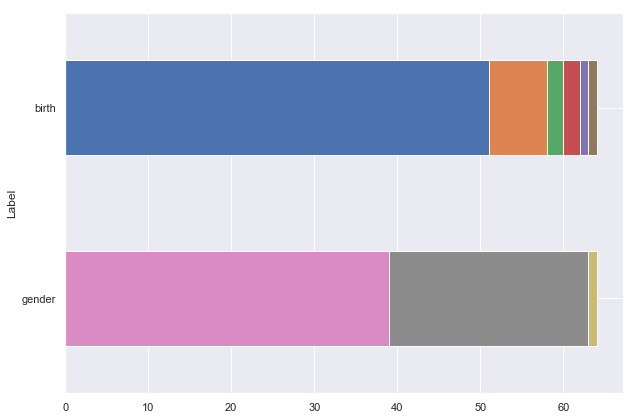

In [324]:
test[::-1].plot.barh(stacked=True, figsize=(10,7),legend=None)

In [325]:

p1 = plt.barh('Birth', menMeans, 0.35)
p2 = plt.barh('Birth', womenMeans, 0.35, bottom=menMeans)

TypeError: barh() missing 1 required positional argument: 'width'

In [16]:
print(data['gender'].value_counts())
print(sum(data['gender'].value_counts()))

Male                 39
Female               24
Prefer not to say    1 
Name: gender, dtype: int64
64


In [272]:
df = data.gender.value_counts().reset_index(name="Value")
df.rename(columns={'index': 'Response'},inplace=True)
df['Label'] = pd.Series(['gender' for i in range(len(df))])
df

,Response,Value,Label
0,Male,39,gender
1,Female,24,gender
2,Prefer not to say,1,gender


In [273]:
pivot_df = df.pivot(index='Label', columns='Response', values='Value')
pivot_df = pivot_df[pivot_df.columns[pivot_df.loc[pivot_df.last_valid_index()].argsort()[::-1]]]

In [308]:
sequence = [str(i) for i in stacked.columns.to_list()]
sequence.extend(pivot_df.columns.to_list())
# pivot_df.columns.to_list()
# sequence
pivot_df.columns.to_list()

['Male', 'Female', 'Prefer not to say']

In [309]:
stacked.columns.to_list() + pivot_df.columns.to_list()

[1997, 1996, 1998, 1995, 1994, 1987, 'Male', 'Female', 'Prefer not to say']

In [318]:
test = pd.concat([stacked,pivot_df])
test = test.reindex(columns=stacked.columns.to_list() + pivot_df.columns.to_list())

In [17]:
print(data['sexuality'].value_counts())
print(sum(data['sexuality'].value_counts()))

Heterosexual         51
Bisexual             6 
Homosexual           5 
Prefer not to say    1 
Asexual              1 
Name: sexuality, dtype: int64
64


In [18]:
print(data['ethnicity'].value_counts())
print(sum(data['ethnicity'].value_counts()))

Cauasian           24
East Asian         21
South Asian        9 
Southeast Asian    7 
Mixed              2 
Middle Eastern     1 
Name: ethnicity, dtype: int64
64


In [19]:
print(data['childhood'].value_counts())
print(sum(data['childhood'].value_counts()))

GTA              34
Other Ontario    10
KW               9 
International    7 
Other Canada     4 
Name: childhood, dtype: int64
64


In [29]:
print(data['religion'].value_counts())
print(sum(data['religion'].value_counts()))

Agnostic                       17
Christian                      13
Atheist                        11
Catholic                       8 
Hindu                          6 
Sikh                           2 
None                           2 
Spiritual but Non-religious    2 
Muslim                         2 
Buddist                        1 
Name: religion, dtype: int64
64


In [30]:
print(data['politics'].value_counts())
print(sum(data['politics'].value_counts()))

2    35
3    22
1    5 
4    2 
Name: politics, dtype: int64
64


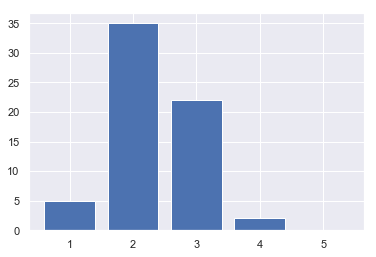

In [52]:
politics = plt.bar([1,2,3,4,5],
                   data['politics'].value_counts().append(pd.Series([0], index=[5])).sort_index())

In [57]:
print(data['parent_edu'].value_counts())
print(sum(data['parent_edu'].value_counts()))

Bachelors           33
Masters             23
Doctorate           4 
Technical Degree    2 
None                1 
High School         1 
Name: parent_edu, dtype: int64
64


In [58]:
print(data['parent_north_amer'].value_counts())
print(sum(data['parent_north_amer'].value_counts()))

No     35
Yes    29
Name: parent_north_amer, dtype: int64
64


In [84]:
household_inc = data['household_inc'].value_counts().sort_index()
household_inc = household_inc.iloc[[0]].append(household_inc.iloc[[6]]).append(household_inc.iloc[[1,2,3,4,5,7]])
print(household_inc)
print(sum(household_inc))

$0 - 50k       6 
$50 - 100k     8 
$100 - 150k    14
$150 - 200k    18
$200 - 250k    7 
$250 - 300k    3 
$300k +        5 
None           3 
Name: household_inc, dtype: int64
64


In [85]:
print(data['parent_stem'].value_counts())
print(sum(data['parent_stem'].value_counts()))

Yes, engineering            26
No                          21
Yes, but not engineering    17
Name: parent_stem, dtype: int64
64


In [87]:
print(data['family_funded'].value_counts().sort_index())
print(sum(data['family_funded'].value_counts()))

0 - 25%      21
25 - 50%     17
50 - 75%     11
75 - 100%    15
Name: family_funded, dtype: int64
64


In [88]:
print(data['hs_avg'].value_counts().sort_index())
print(sum(data['hs_avg'].value_counts()))

85.0    1 
86.0    2 
87.0    5 
88.0    3 
89.0    5 
90.0    4 
90.5    1 
91.0    1 
92.0    5 
93.0    11
93.5    1 
94.0    8 
94.5    1 
94.6    1 
95.0    8 
96.0    3 
97.0    3 
Name: hs_avg, dtype: int64
63


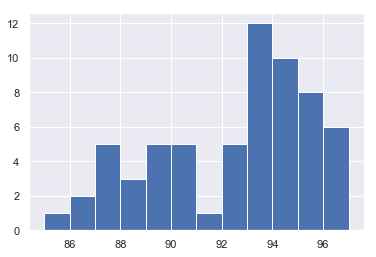

In [114]:
hs_avg_hist = plt.hist(data.hs_avg,bins=12)

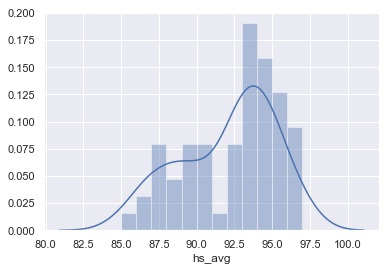

In [115]:
hs_avg_dist = sns.distplot(data.hs_avg,bins=12)

In [111]:
data.hs_avg.mean()

92.04920634920636

In [171]:
hs_extrac = pd.DataFrame(data.hs_extrac)
hs_extrac = pd.concat([pd.Series(row['hs_extrac'].split(', ')) for _, row in hs_extrac.iterrows()]).reset_index()[0]
print(hs_extrac.value_counts())

Student club member                44
Local volunteering                 35
Organized sports                   32
Non-engineering related job        29
Student club leader                28
Music                              25
Leadership program                 25
Religious activities               9 
Theatre                            7 
Engineering related job            6 
None                               3 
Classics conference                1 
Dance                              1 
Business program                   1 
Math & Programming Competitions    1 
casual sports                      1 
Name: 0, dtype: int64


In [170]:
hs_accel = pd.DataFrame(data.hs_accel)
hs_accel = pd.concat([pd.Series(row['hs_accel'].split(', ')) for _, row in hs_accel.iterrows()]).reset_index()[0]
print(hs_accel.value_counts())

None                                     29
AP                                       9 
Gifted/enhanced                          7 
IB                                       7 
Private school                           6 
French immersion                         5 
Extended French                          3 
International Business and Technology    1 
Extended French Program                  1 
art specialist                           1 
ICT SHSM                                 1 
Name: 0, dtype: int64


In [145]:
print(data['discovery'].value_counts())
print(sum(data['discovery'].value_counts()))

Word of mouth            27
Website/research         21
University open house    9 
University fair          3 
Family                   2 
First Year               1 
OUAC Application         1 
Name: discovery, dtype: int64
64


In [169]:
fac_apps = pd.DataFrame(data.fac_apps)
fac_apps = pd.concat([pd.Series(row['fac_apps'].split(', ')) for _, row in fac_apps.iterrows()]).reset_index()[0]
print(fac_apps.value_counts())

None                      21
Math                      16
Science                   13
Business                  11
Computer Science          10
Arts                      7 
Environment               4 
Architecture              3 
Concurrent Ed             1 
Applied Health Science    1 
Name: 0, dtype: int64


In [162]:
print(data['industry_goal'].value_counts())
print(sum(data['industry_goal'].value_counts()))

Healthcare           14
Software             9 
Finance              8 
Arts/Media           6 
Manufacturing        4 
Academia/Research    4 
No idea              2 
Hardware             2 
Sustainability       1 
I didnt know         1 
Food                 1 
No clue              1 
I did not know       1 
no idea              1 
had no clue!         1 
Biology              1 
Game Development     1 
Civil                1 
I didn't know        1 
Wasn't sure          1 
Name: industry_goal, dtype: int64
61


In [172]:
industry_goal = pd.DataFrame(data.industry_goal).fillna(
    'Unsure').replace(
    'No idea','Unsure').replace(
    'I didnt know', 'Unsure').replace(
    'No clue', 'Unsure').replace(
    'I did not know', 'Unsure').replace(
    'no idea', 'Unsure').replace(
    'had no clue! ', 'Unsure').replace(
    'I didn\'t know', 'Unsure').replace(
    'Wasn\'t sure', 'Unsure')
industry_goal = pd.concat([pd.Series(row['industry_goal'].split(', ')) for _, row in industry_goal.iterrows()]).reset_index()[0]
print(industry_goal.value_counts())
print(sum(industry_goal.value_counts()))

Healthcare           14
Unsure               12
Software             9 
Finance              8 
Arts/Media           6 
Academia/Research    4 
Manufacturing        4 
Hardware             2 
Biology              1 
Civil                1 
Game Development     1 
Food                 1 
Sustainability       1 
Name: 0, dtype: int64
64
